<a href="https://colab.research.google.com/github/sahug/tensorflow-colab/blob/Tensorflow_2_0_Dropout_and_Batch_Normalization_2D_CNN_Dog_vs_Cat/Tensorflow_2_0_Dropout_and_Batch_Normalization_2D_CNN_Dog_vs_Cat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **What is Dropout**

The term “dropout” refers to dropping out units (both hidden and visible) in a neural network.
Simply put, dropout refers to ignoring units (i.e. neurons) during the training phase of certain set of neurons which is chosen at random. By “ignoring”, I mean these units are not considered during a particular forward or backward pass.

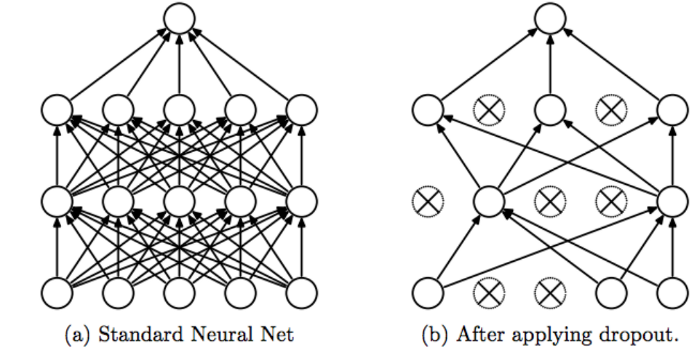

# **What is Batch Normalization**

Batch normalization (also known as batch norm) is a method used to make artificial neural networks faster and more stable through normalization of the input layer by re-centering and re-scaling

# **VGG16 Model**

VGG16 is a convolutional neural network model proposed by K. Simonyan and A. Zisserman from the University of Oxford in the paper “Very Deep Convolutional Networks for Large-Scale Image Recognition”. The model achieves 92.7% top-5 test accuracy in ImageNet, which is a dataset of over 14 million images belonging to 1000 classes. It was one of the famous model submitted to ILSVRC-2014. It makes the improvement over AlexNet by replacing large kernel-sized filters (11 and 5 in the first and second convolutional layer, respectively) with multiple 3×3 kernel-sized filters one after another. VGG16 was trained for weeks and was using NVIDIA Titan Black GPU’s.

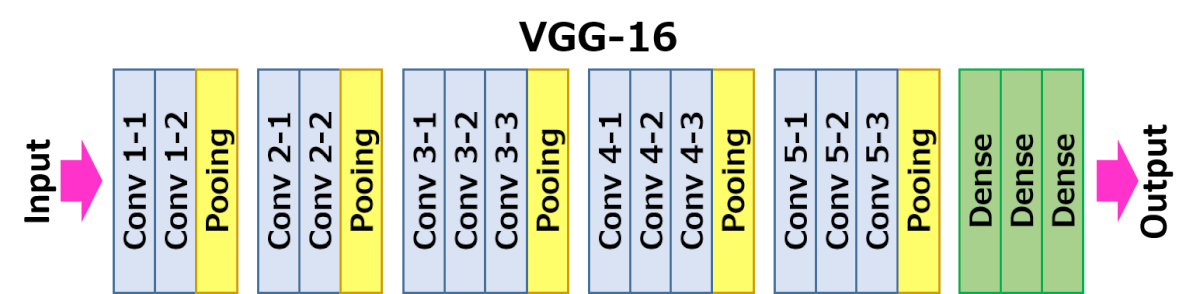

In [1]:
!pip install tensorflow-gpu==2.0.0

     |████████████████████████████████| 380.8MB 40kB/s 
     |████████████████████████████████| 3.8MB 43.2MB/s 
     |████████████████████████████████| 51kB 6.1MB/s 
     |████████████████████████████████| 450kB 38.7MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7542 sha256=0f32f0c92921e7f5fb31d4c65d9660e60485c98a4d4bd28cb94b505321402bb4
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
ERROR: tensorflow 2.3.0 has requirement gast==0.3.3, but you'll have gast 0.2.2 which is incompatible.
ERROR: tensorflow 2.3.0 has requirement tensorboard<3,>=2.3.0, but you'll have tensorboard 2.0.2 which is incompatible.
ERROR: tensorflow 2.3.0 has requirement tensorflow-estimator<2.4.0,>=2.3.0, but you'll have tensorflow-estimator 2.0.1 which is incompatible.
ERROR: tensorflow-probability 0.11.0 has requirement gast>=0.3.2, but you'll have gast 0.2.2 which is incompatible.
  Found existing ins

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPool2D, ZeroPadding2D, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator # To convert image in to array

from tensorflow.keras.optimizers import SGD

In [3]:
print(tf.__version__)

2.0.0


In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
# Downloading Data
!git clone https://github.com/laxmimerit/dog-cat-full-dataset.git

Cloning into 'dog-cat-full-dataset'...
remote: Enumerating objects: 25027, done.
remote: Total 25027 (delta 0), reused 0 (delta 0), pack-reused 25027
Receiving objects: 100% (25027/25027), 541.62 MiB | 35.45 MiB/s, done.
Resolving deltas: 100% (5/5), done.
Checking out files: 100% (25001/25001), done.


In [7]:
# Now data is available. Setting path to fetch it from. 
# Its available in below paths. Also, can see in the folder structure here.
test_data_dir = "/content/dog-cat-full-dataset/data/test"
train_data_dir = "/content/dog-cat-full-dataset/data/train"

In [8]:
# Since the size of our original data are very large. Setting it to 32 x 32.
img_width = 32
img_height = 32
batch_size = 20

In [9]:
datagen = ImageDataGenerator(rescale=1./255) #Rescalling all data between 0 to 1. 

In [12]:
train_generator = datagen.flow_from_directory(directory=train_data_dir, 
                                              target_size=(img_width, img_height),
                                              classes=["dogs", "cats"], #Name as in our dataset directory
                                              class_mode="binary", #0 is dogs and 1 is cats, as its binary setting it to binary here
                                              batch_size=batch_size)

Found 20000 images belonging to 2 classes.


In [13]:
train_generator.classes

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [15]:
validation_generator = datagen.flow_from_directory(directory=test_data_dir, 
                                              target_size=(img_width, img_height),
                                              classes=["dogs", "cats"], #Name as in our dataset directory
                                              class_mode="binary", #0 is dogs and 1 is cats, as its binary setting it to binary here
                                              batch_size=batch_size)

Found 5000 images belonging to 2 classes.


In [16]:
# Since processing in batch the first batch size is 1000. 1000 x 20 = 20000. 20 is batch_size.
len(train_generator) 

1000

# **Build CCN Base Model**

In [19]:
model = Sequential()

model.add(Conv2D(
    filters=64, 
    kernel_size=(3, 3), 
    activation="relu",
    strides=(1, 1), 
    padding="same", 
    kernel_initializer="he_uniform", 
    input_shape=(img_width, img_height, 3) #3 represents colored data. RBG.
    ))

model.add(MaxPool2D(2, 2))

model.add(Flatten()) # Converting 2D to 1D.

model.add(Dense(128, activation="relu", kernel_initializer="he_uniform"))

model.add(Dense(1, activation="sigmoid")) # Output will be 0 or 1. Using sigmoid as it detects 0 or 1.



In [20]:
opt = SGD(learning_rate=0.01, momentum=0.9)

In [21]:
model.compile(optimizer=opt, loss="binary_crossentropy", metrics=["accuracy"])

In [22]:
history = model.fit_generator(
    generator=train_generator, 
    steps_per_epoch=len(train_generator), 
    epochs=5, 
    validation_data=validation_generator,
    validation_steps=len(validation_generator),
    verbose=1
    )

Epoch 1/5
1000/1000 [==============================] - 131s 131ms/step - loss: 0.6977 - accuracy: 0.5000 - val_loss: 0.6996 - val_accuracy: 0.5000
Epoch 2/5
1000/1000 [==============================] - 126s 126ms/step - loss: 0.6930 - accuracy: 0.5036 - val_loss: 0.6932 - val_accuracy: 0.5012
Epoch 3/5
1000/1000 [==============================] - 126s 126ms/step - loss: 0.6914 - accuracy: 0.5073 - val_loss: 0.6953 - val_accuracy: 0.5050
Epoch 4/5
1000/1000 [==============================] - 128s 128ms/step - loss: 0.6704 - accuracy: 0.5869 - val_loss: 0.6598 - val_accuracy: 0.6056
Epoch 5/5
1000/1000 [==============================] - 122s 122ms/step - loss: 0.5982 - accuracy: 0.6836 - val_loss: 0.5564 - val_accuracy: 0.7268


In [23]:
history.history

{'accuracy': [0.5, 0.5036, 0.5073, 0.5869, 0.6836],
 'loss': [0.6976575251817704,
  0.6929560371637344,
  0.6913894665241241,
  0.6704277375936508,
  0.5982441828846932],
 'val_accuracy': [0.5, 0.5012, 0.505, 0.6056, 0.7268],
 'val_loss': [0.6996469905376435,
  0.6931514899730682,
  0.6952657551765442,
  0.659804523229599,
  0.5563771530389786]}

In [ ]:
epoch_range = range(1, 6) # No of Epochs used to train. 6 - 1 = 5

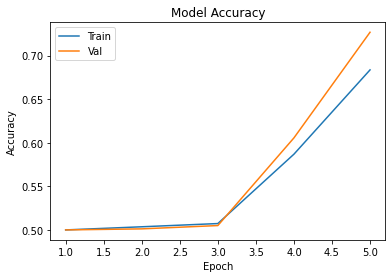

In [24]:
# Plot training and validation accuracy values
# sparse_categorical_accuracy vs val_sparse_categorical_accuracy
plt.plot(epoch_range, history.history["accuracy"])
plt.plot(epoch_range, history.history["val_accuracy"])
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Train", "Val"], loc="upper left")
plt.show()

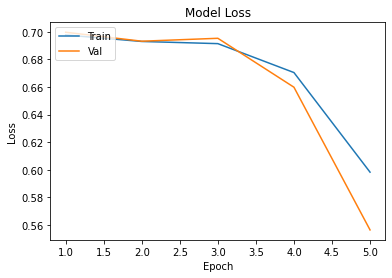

In [25]:
# Plot training and validation loss values
# Loss vs Val_Loss
plt.plot(epoch_range, history.history["loss"])
plt.plot(epoch_range, history.history["val_loss"])
plt.title("Model Loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Train", "Val"], loc="upper left")
plt.show()

# **Implement First 3 Block of VGG16 Model**

In [26]:
model = Sequential()
model.add(Conv2D(
    filters=64, 
    kernel_size=(3, 3), 
    activation="relu",
    strides=(1, 1), 
    padding="same", 
    kernel_initializer="he_uniform", 
    input_shape=(img_width, img_height, 3) #3 represents colored data. RBG.
    ))
model.add(MaxPool2D(2, 2))

model = Sequential()
model.add(Conv2D(
    filters=128, 
    kernel_size=(3, 3), 
    activation="relu",
    padding="same", 
    kernel_initializer="he_uniform"
    ))
model.add(MaxPool2D(2, 2))

model = Sequential()
model.add(Conv2D(
    filters=256, 
    kernel_size=(3, 3), 
    activation="relu",
    padding="same", 
    kernel_initializer="he_uniform"
    ))
model.add(MaxPool2D(2, 2))

model.add(Flatten()) # Converting 2D to 1D.

model.add(Dense(128, activation="relu", kernel_initializer="he_uniform"))

model.add(Dense(1, activation="sigmoid")) # Output will be 0 or 1. Using sigmoid as it detects 0 or 1.



In [27]:
opt = SGD(learning_rate=0.01, momentum=0.9)

In [29]:
model.compile(optimizer=opt, loss="binary_crossentropy", metrics=["accuracy"])

In [30]:
history = model.fit_generator(
    generator=train_generator, 
    steps_per_epoch=len(train_generator), 
    epochs=5, 
    validation_data=validation_generator,
    validation_steps=len(validation_generator),
    verbose=1
    )

Epoch 1/5
1000/1000 [==============================] - 230s 230ms/step - loss: 7.6606 - accuracy: 0.5034 - val_loss: 7.6666 - val_accuracy: 0.5000
Epoch 2/5
1000/1000 [==============================] - 231s 231ms/step - loss: 7.6666 - accuracy: 0.5045 - val_loss: 7.6666 - val_accuracy: 0.5000
Epoch 3/5
1000/1000 [==============================] - 229s 229ms/step - loss: 7.6666 - accuracy: 0.5083 - val_loss: 7.6666 - val_accuracy: 0.5000
Epoch 4/5
1000/1000 [==============================] - 223s 223ms/step - loss: 7.6666 - accuracy: 0.4995 - val_loss: 7.6666 - val_accuracy: 0.5000
Epoch 5/5
1000/1000 [==============================] - 221s 221ms/step - loss: 7.6666 - accuracy: 0.5010 - val_loss: 7.6666 - val_accuracy: 0.5000


The above model gives 50% accuracy which is pretty bad. So lets add batch normalization.

In [31]:
model = Sequential()
model.add(Conv2D(
    filters=64, 
    kernel_size=(3, 3), 
    activation="relu",
    strides=(1, 1), 
    padding="same", 
    kernel_initializer="he_uniform", 
    input_shape=(img_width, img_height, 3) #3 represents colored data. RBG.
    ))
model.add(BatchNormalization()) # Adding Normalization Layer
model.add(MaxPool2D(2, 2))
model.add(Dropout(0.2)) # Dropping 20% of neurons randomly

model = Sequential()
model.add(Conv2D(
    filters=128, 
    kernel_size=(3, 3), 
    activation="relu",
    padding="same", 
    kernel_initializer="he_uniform"
    ))
model.add(BatchNormalization()) # Adding Normalization Layer
model.add(MaxPool2D(2, 2))
model.add(Dropout(0.3)) # Dropping 30% of neurons randomly

model = Sequential()
model.add(Conv2D(
    filters=256, 
    kernel_size=(3, 3), 
    activation="relu",
    padding="same", 
    kernel_initializer="he_uniform"
    ))
model.add(BatchNormalization()) # Adding Normalization Layer
model.add(MaxPool2D(2, 2))
model.add(Dropout(0.5)) # Dropping 50% of neurons randomly

model.add(Flatten()) # Converting 2D to 1D.
model.add(Dense(128, activation="relu", kernel_initializer="he_uniform"))
model.add(BatchNormalization()) # Adding Normalization Layer
model.add(Dropout(0.5)) # Dropping 50% of neurons randomly

model.add(Dense(1, activation="sigmoid")) # Output will be 0 or 1. Using sigmoid as it detects 0 or 1.



In [32]:
opt = SGD(learning_rate=0.01, momentum=0.9)

In [33]:
model.compile(optimizer=opt, loss="binary_crossentropy", metrics=["accuracy"])

In [34]:
history = model.fit_generator(
    generator=train_generator, 
    steps_per_epoch=len(train_generator), 
    epochs=10, # Increased epoch from 5 to 10
    validation_data=validation_generator,
    validation_steps=len(validation_generator),
    verbose=1
    )

Epoch 1/10
1000/1000 [==============================] - 380s 380ms/step - loss: 0.6720 - accuracy: 0.6034 - val_loss: 0.5545 - val_accuracy: 0.7246
Epoch 2/10
1000/1000 [==============================] - 381s 381ms/step - loss: 0.5886 - accuracy: 0.6939 - val_loss: 0.5307 - val_accuracy: 0.7416
Epoch 3/10
1000/1000 [==============================] - 378s 378ms/step - loss: 0.5604 - accuracy: 0.7207 - val_loss: 0.5294 - val_accuracy: 0.7452
Epoch 4/10
1000/1000 [==============================] - 372s 372ms/step - loss: 0.5273 - accuracy: 0.7486 - val_loss: 0.5470 - val_accuracy: 0.7284
Epoch 5/10
1000/1000 [==============================] - 374s 374ms/step - loss: 0.5080 - accuracy: 0.7567 - val_loss: 0.5170 - val_accuracy: 0.7546
Epoch 6/10
1000/1000 [==============================] - 373s 373ms/step - loss: 0.4937 - accuracy: 0.7632 - val_loss: 0.5037 - val_accuracy: 0.7480
Epoch 7/10
1000/1000 [==============================] - 383s 383ms/step - loss: 0.4828 - accuracy: 0.7752 - val_

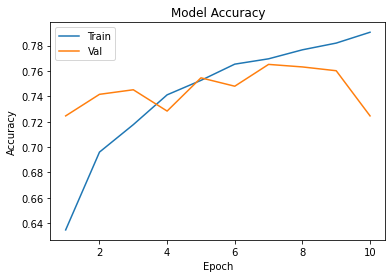

In [37]:
# Plot training and validation accuracy values
# sparse_categorical_accuracy vs val_sparse_categorical_accuracy
plt.plot(range(1, 11), history.history["accuracy"])
plt.plot(range(1, 11), history.history["val_accuracy"])
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Train", "Val"], loc="upper left")
plt.show()

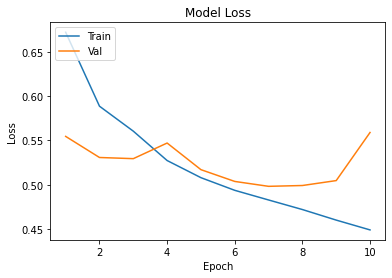

In [38]:
# Plot training and validation loss values
# Loss vs Val_Loss
plt.plot(range(1, 11), history.history["loss"])
plt.plot(range(1, 11), history.history["val_loss"])
plt.title("Model Loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Train", "Val"], loc="upper left")
plt.show()